# Paramagnetism

In this lecture, we're going to discuss how some of the tools we have developed can be used for studying different physical effects. In particular, we're going to look at the relationship between thermodynamics and magnetic dipoles.

Recall from lecture 2 that the magnetic dipole moment is given by $-{\bf \mu} \cdot {\bf B}$. Now, imagine we have a lattice of dipoles, and that the dipoles do not interact with each other. If we then apply a magnetic field to this lattice, the dipoles will line up and either contribute $-\mu B$ or $\mu B$ to the energy of the system. This effect, where a magnetic field applied to the a system causes the magnetic moments to line up, is called **paramagnetism**.

First, let's figure out what classical thermodynamic quantities we need to address this problem. Recall that the first law of thermodynamics is
$$
    U = Q+W
$$
The work on dipole to line it up is given by $-{\bf m} \cdot {\rm d} {\bf B}$. This is analogous to the work done compressing a gas. As such, we can write an equivalent of the first law of thermodynamics as
$$
    {\rm d} U = T {\rm d} S - m {\rm d} B
$$
The magnetic moment is $m=MV$, where M is the magnetization and V is the volume. We are now going to define the magnetic susceptibility to be
$$
    \chi = \lim_{H \to 0}\frac{M}{H}
$$
whe H is the magnetic field strength (and is related to the magnetic flux density, B, through $B=\mu_0(H+M)$. For paramagnets, $\chi << 1$ which implies that $M<<H$, meaning we can approximate it as
$$
    \chi \approx \frac{\mu_0 M}{B}
$$
Our new definition of the first law also implies that we can write an equivalent of the Helmholtz function
$$
    F = U - TS
$$
such that
$$
    {\rm d} F = -S {\rm d} T - m {\rm d} B
$$

Now, let's consider a single dipole in our system, and write down the partition function:
$$
    Z_1 = \sum_i {\rm e}^{- \beta E_i}= {\rm e}^{-\beta \mu B} + {\rm e}^{\beta \mu B} = 2 \cosh (\beta \mu B)
$$
This means the probability of having a dipole contribute an interaction energy of $\mp\mu B$ looks like

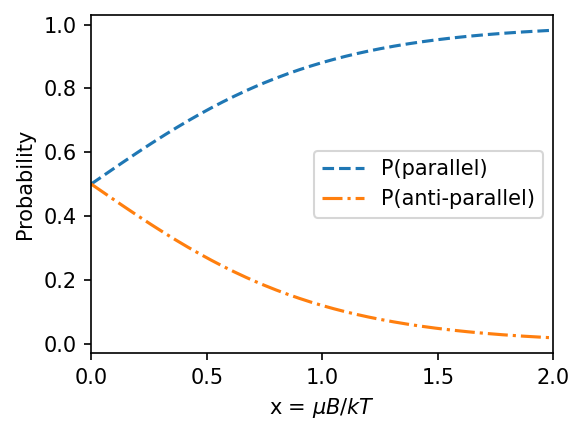

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,2,0.01)
Z = 2*np.cosh(x)
P_aligned = np.exp(x)/Z
P_antialigned = np.exp(-x)/Z

plt.figure(figsize=[4,3],dpi=150)
plt.plot(x,P_aligned,'--',label='P(parallel)')
plt.plot(x,P_antialigned,'-.',label='P(anti-parallel)')
plt.ylabel("Probability")
plt.xlabel("x = $\mu B/ k T$")
plt.legend()
plt.xlim(0,2)
plt.tight_layout()
plt.savefig("Figures/x_versus_prob.png")
plt.show()

So what does this graph tell us? Over on the left $x<<1$. This means that the magnetic field is weak, and the temperature is high. Under such conditions, each dipole has a 50/50 chance of being parallel or anti-parallel. Over on the far right, we have $x>>1$, which means the magnetic field is strong and the temperature is small. Under these conditions, the dipoles all end up parallel.

Looking at this picture, and thinking about it for a while, should convince you that in this situation we are balancing internal energy versus entropy - when we hav a low temperature and high magnetic field, then we are maximising the internal energy. When we have a low magnetic field and a high temperature, we are maximising the entropy of the system. As such, we can use Helmoholtz's function for this problem.


In the last lecture, we found that the partition function for N particles which are not intereacting and which are distinguishable, the partition function is then given by
$$
    Z = Z_1^N.
$$
The internal energy of the system is given by
$$
   U = -\frac{{\rm d} \ln Z}{{\rm d} \beta}= -N \mu B \tanh\left(\mu \beta B\right)
$$
The Helmholtz function is then given by
$$
    F = -k_{\rm B} T \ln (Z_N) = -N k_{\rm B} T \ln [2 \cosh (\beta \mu B)]
$$
Also, given that the Helmholtz function
$$
    {\rm d} F = -S {\rm d} T - m {\rm d} B
$$
leads to
$$
    m = -\left(\frac{\partial F}{\partial B}\right)_T = N \mu \tanh (\beta \mu B)
$$

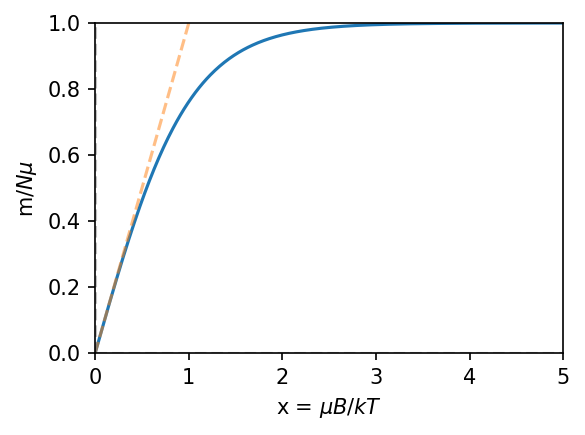

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,5,0.01)
m = np.tanh(x)

plt.figure(figsize=[4,3],dpi=150)
plt.plot(x,m)
plt.plot(x,x,'--',alpha=0.5)
plt.ylabel(r"m/$N\mu$")
plt.xlabel("x = $\mu B/ k T$")
plt.axvline(0,linestyle='--',color='grey',alpha=0.5)
plt.axhline(0,linestyle='--',color='grey',alpha=0.5)
plt.xlim(0,5)
plt.ylim(0,1)
plt.tight_layout()
plt.savefig("Figures/x_versus_m.png")
plt.show()

Returning to the magnetisation, we wrote this quantity down earlier as
$$
    M = \frac{m}{V} = \frac{N \mu}{V} \tanh (\beta \mu B)
$$
If we focus on the weak field regime (where the dependance between m and tanh is basically linear, orange line above), then we have that
$$
    M = \frac{N \mu^2 B}{V k_{\rm B} T}
$$
This combined with the expression above for susceptability gives us that
$$
    \chi = \frac{N \mu^2 \mu_0}{V k_{\rm B} T}
$$
This shows that the magnetic susceptability of a paramagnet is inversely proportional to its temperature. This is known as Curie's law, and also means that since
$$
    \chi \propto \frac{1}{T}
$$
then this means that 
$$
    \left( \frac{\partial \chi}{\partial T} \right)_B < 0
$$
We'll need this in a second.

So, what does this let us accomplish? Well, let's consider the Helmholtz Free Energy again. It leads to the equiavelent Maxwell relation of
$$
    \left(\frac{\partial S}{\partial B}\right)_T = \left(\frac{\partial m}{\partial T}\right)_B \approx \frac{V B}{\mu_0} \left( \frac{\partial \chi}{\partial T} \right)_B
$$
Thus, the change in heat during an isothermal change in the B field is
$$
    \Delta Q = T \left( \frac{\partial S}{\partial B} \right)_T \Delta B = \frac{T V B}{\mu_0} \left( \frac{\partial \chi}{\partial T} \right)_B \Delta B<0
$$
This means that heat is emitted from the matieral during this process.

We can use our usual trick of dealing with differentials
$$
    \left(\frac{\partial T}{\partial B}\right)_S \left(\frac{\partial B}{\partial S}\right)_T \left(\frac{\partial S}{\partial T}\right)_B = -1
$$
to obtain an expression for change in temprature due to an adiabatic change in the B field
$$
    \left(\frac{\partial T}{\partial B}\right)_S = - \left(\frac{\partial S}{\partial B}\right)_T \left(\frac{\partial T}{\partial S}\right)_B.
$$
If we define the heat capacity at constant magnetic field to be $C_{B} = T \left(\frac{\partial S}{\partial T}\right)_B$ then we get
$$
    \left(\frac{\partial T}{\partial B}\right)_S = - \frac{T V B}{\mu_0 C_B} \left(\frac{\partial \chi}{\partial T}\right)_B
$$ 
where has to be $>0$. This means that we can cool down the paramagnet by adiabatically reducing the magnetic field on the sample. This is an incredibly useful result, as experimentally it allows for cooling of systems to millikelin (for electronic systems) and microkelvin (nuclear systems).

Such a cooling proceeds in the following manner.

1. A paramagnetic system is coupled to a heat bath, which is typically liquid helium at 4.2 K.
2. Isothermal magnetisation of the sample proceeds. Since in this process $\Delta Q < 0$ for positive increases in the B field, the paramagnet transfers heat into the liquid helium heat bath.
3. The system is decouple from the heat bath.
4. The system is adiabatically demagntised. Since $\left(\frac{\partial T}{\partial B}\right)_S$ is positive, this means reducing the B field reduces the temperature. This leads to a significant cooling of the system.

# Density of States

In order to derive the equation of state of an ideal gas from statistical mechanics, we require a few results from quantum mechanics, and a more general discussion on the partition function. The first thing we need to do is to figure out what the allowed states are for an ideal gas, as we need this for the partition function.

Imagine a cube with dimensions $L\times L \times L$ and a volume of $V$, filled with a gas. Each molecule in the gas will have a mass $m$ and momentum ${\bf p}$. For convenience, we are going to use the parameter ${\bf k}=\frac{{\bf p}}{\hbar}$, which is also known as the wave vector.

The result we require from quantum mechanics is that the solution to the Schrodinger equation for a particle which is trapped in a box is
$$
    \psi (x,y,z) = \left(\frac{2}{L}\right)^{3/2} \sin (k_x x)\sin (k_y y)\sin (k_z z)
$$

The leading factor here is a normalising factor such that $\int |\psi|^2 = 1$. Ok, now we are going to impose that the particles must be inside of the box. This means that the wave equation must go to 0 at the boundaries of our cube ($x=0$,$x=L$,$y=0$,$y=L$,$z=0$,$z=L$). This occurs when
$$
    k_x = \frac{n_x \pi}{L}, \: \: \: k_y = \frac{n_y \pi}{L}, \: \: \: k_z = \frac{n_z \pi}{L}
$$
where $n_x,n_y, n_z$ are all positive integers. This means that every state that a particle can exist in within the box can be specified by a triplet of integers. As such, we can represent these states in three-dimensional k-space. The distance between a given point and a point in any other direction is thus $\pi / L$. To really see this, imagine we were doing this in two dimensions instead of three.

Back in 3 dimensions, this means that a single point in k-space occupies a volume of
$$
    \frac{\pi}{L}\times\frac{\pi}{L}\times\frac{\pi}{L} = \left(\frac{\pi}{L}\right)^3
$$

Now, let's say we have a wave vector $k=|{\bf k}|$. The number of allowed states with a wave vector whose magnitude lies between $k$ and $k+{\rm d}k$ lie within one octant of a spherical shell shell of radius $k$ and thickness $k+{\rm d}k$ (where we are only concerned with 1 octant as we are only allowing $k_x,k_y,k_z$ to be positive).  The volume occupied by this shell is
$$
    \frac{1}{8} 4\pi k^2 {\rm d} k
$$
![DoS](Figures/Density_of_States.png)

As such, the number of allowed states with a wave vector whose magnitude lies between $k$ and $k+{\rm d} k$ is given by $g(k){\rm d}k$ where $g(k)$ is the density of states. This number of states is given by
$$
    g(k){\rm d}k = \frac{{\rm volume\;in\;k-space\;of\;one\;octant\;of\;the\;spherical\;shell}}{{\rm volume\;in\;k-space\;occupied\;per\;allowed\;state}}
$$
This implies that
$$
    g(k){\rm d}k = \frac{1}{8}\frac{4\pi k^2 {\rm d} k}{(\pi/L)^3} = \frac{V k^2 {\rm d} k}{2\pi^2}
$$

# Quantum Concentration

Now, the partition function for a single particle in an ideal gas is given by
$$
    Z_1 = \int_0 ^\infty {\rm e}^{-\beta E(k)} g(k) {\rm d}{k}
$$
where the energy of a single particle with wave vector $k$ is given by
$$
    E(k) = \frac{\hbar^2 k^2}{2m}
$$
Substituting for $E$ and $g$ now gives
$$
    Z_1 = \int_0 ^\infty {\rm e}^{-\beta \frac{\hbar^2 k^2}{2m}} \frac{V k^2 }{2\pi^2} {\rm d}{k} = \frac{V}{\hbar^3} \left(\frac{mk_{\rm B}T}{2\pi}\right)^{3/2}
$$
which is more easily written as
$$
    Z_1 = V n_{\rm Q}
$$
where $n_{\rm Q}$ is known as the quantum concentration, and is given by 
$$
    n_{\rm Q} = \frac{1}{\hbar^3} \left(\frac{mk_{\rm B}T}{2\pi}\right)^{3/2}
$$
We can now define what is known as the **thermal wavelength** as 
$$
    \lambda_{\rm th} = 1/n_{\rm Q}^{1/3} = \frac{h}{\sqrt{2\pi m k_{\rm B} T}}
$$
which also means that the partition function is given by
$$
    Z_1 = \frac{V}{\lambda_{\rm th}^3}
$$

# Distinguishability

So now that we know what the partition function is for a single particle, we need to derive what it is for the entire system. First, let's say that each particle can have energies
$$
    \epsilon_1 \leq \epsilon_2 \leq \epsilon_3...\leq\epsilon_r \leq ...
$$
with each energy level being discrete (which again is a results from quantum mechanics). Now if the gas has N particles at temperature T and within volume V, then we will say that 

* $n_1$ are in state $\epsilon_1$
* $n_2$ are in state $\epsilon_2$

etc. As such, $n_r$ is our occupation number. The energy must then be
$$
    U = \sum_r n_r \epsilon_r
$$
and
$$
    N = \sum_r n_r
$$
For one particle in this system, the partition function is
$$
    Z_1 = \sum_r {\rm e}^{-\beta \epsilon_r}
$$
When we considered paramagntism, we simply said that
$$
    Z = Z_1^N
$$
However, this is only true because the particles were distinguishable. In this case, we have no way of telling one particle from another, which means this is not true for indistinguishable particles. Let's look at this in detail.

Imagine there are 3 particles:
$$
    Z_3 \propto \sum_q {\rm e}^{-\beta \epsilon_q} \sum_r {\rm e}^{-\beta \epsilon_r} \sum_s {\rm e}^{-\beta \epsilon_s}
$$
(which is just a product of the individual partition functions for each of the particles). Rewriting gives 
$$
    Z_3 \propto \sum_q \sum_r \sum_s {\rm e}^{-\beta (\epsilon_q+\epsilon_r+\epsilon_s)}
$$
Regrouping terms for clarity this becomes
$$
    Z_3 \propto \sum_r {\rm e}^{-3 \beta (\epsilon_r)} + (\sum_r\sum_s)_{r \neq s} {\rm e}^{- \beta (2 \epsilon_r + \epsilon_s)} + (\sum_r\sum_s\sum_q)_{r \neq s \neq q} {\rm e}^{- \beta (\epsilon_r + \epsilon_s+ \epsilon_q)}
$$
where the first term accounts for all 3 particles being in the same state, the second accounts for 2 particles in same state, and the last accounts for all particles in different states. Now we must find the appropriate normalisation coefficients, so that we don't want to count the same state more than once.

* The first term has a coefficient of 1: there is only 1 way to put all three particles in the same state.

![Term_1](Figures/Energy_levels_all_in_one.png)

* The second term has a coefficient of 1/3: There are three possibilities to have one particle in one state and the other two particles in the same, different state. Note that we always have to have 2 particles in level $\epsilon_r$ because of how we have grouped the terms in the previous equation.

![Term_2](Figures/Energy_levels_two_in_one_one_in_other.png)

* The third term has a coefficient of 1/3!: particle 1 is in 1 state of any 3 states, particle 2 is then in 1 state of the remaining 2 states, and particle 3 then has to be in the last available state = (3x2x1 = 3!).

![Term_3](Figures/Energy_levels_all_diff.png)

Thus,
$$
    Z_3 = \sum_r {\rm e}^{-3 \beta (\epsilon_r)} + \frac{1}{3}(\sum_r\sum_s)_{r \neq s} {\rm e}^{- \beta (2 \epsilon_r + \epsilon_s)} + \frac{1}{3!}(\sum_r\sum_s\sum_q)_{r \neq s \neq q} {\rm e}^{- \beta (\epsilon_r + \epsilon_s+ \epsilon_q)}
$$